# Custom Transformer Model evaluation.  
Notebook dedicated to training and evaluation of our custom transformer models.

In [10]:
# imports
import torch
from DataObjects.DataLoader import DataLoader
from Architectures.Transformer.CustomTransformer import CustomTransformerModel

from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
from pathlib import Path

import optuna
from optuna.pruners import SuccessiveHalvingPruner
from optuna.trial import TrialState

In [2]:
# SETTING SEED
SEED = 42069    
torch.manual_seed(SEED)
np.random.seed(0)

In [15]:
# set device to cuda
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [4]:
DATA_PATH = Path("Data")

In [5]:
# prepare Data Loader files
train_dir = DATA_PATH / Path("MFCC_transformed", "training")
val_dir = DATA_PATH / Path("MFCC_transformed", "validation")
test_dir = DATA_PATH / Path("MFCC_transformed", "testing")

batch_size = 64

train_loader = DataLoader(
    data_dir=train_dir,
    data_type='mfcc',
    batch_size=batch_size,
    shuffle=True
)
val_loader = DataLoader(
    data_dir=val_dir,
    data_type='mfcc',
    batch_size=batch_size,
    shuffle=True
)

test_loader = DataLoader(
    data_dir=test_dir,
    data_type='mfcc',
    batch_size=batch_size,
    shuffle=True
)

# Inspect class mapping and dataset size
print("Classes:", train_loader.class_to_idx)
print("# training batches:", len(train_loader))

print("# validation batches:", len(val_loader))

print("# testing batches:", len(test_loader))

Classes: {'bed': 0, 'bird': 1, 'cat': 2, 'dog': 3, 'down': 4, 'eight': 5, 'five': 6, 'four': 7, 'go': 8, 'happy': 9, 'house': 10, 'left': 11, 'marvin': 12, 'nine': 13, 'no': 14, 'off': 15, 'on': 16, 'one': 17, 'right': 18, 'seven': 19, 'sheila': 20, 'silence': 21, 'six': 22, 'stop': 23, 'three': 24, 'tree': 25, 'two': 26, 'up': 27, 'wow': 28, 'yes': 29, 'zero': 30}
# training batches: 586
# validation batches: 216
# testing batches: 211


In [6]:
batch = next(iter(test_loader))
sample = batch.data[0]
C, *rest = sample.shape
if len(rest) == 1:
    input_dim = C
else:
    H, W = rest
    input_dim = C * H

num_classes = len(train_loader.class_to_idx)

model = CustomTransformerModel(
    input_dim=input_dim,
    num_classes=num_classes,
    d_model=128,
    nhead=4,
    num_layers=1,
    lr=1e-3
).to(device)


c:\Users\aaf6\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


In [7]:
# training loop
model.train_architecture(train_loader = train_loader, epochs = 20, val_loader = val_loader)

Epoch 1/20 - train loss: 1.9595 - train accuracy: 0.4230


Evaluating: 100%|██████████| 216/216 [03:14<00:00,  1.11it/s]


Epoch 1/20 - val   loss: 1.5529 - val   accuracy: 0.5468
Epoch 2/20 - train loss: 1.2318 - train accuracy: 0.6327


Evaluating: 100%|██████████| 216/216 [00:02<00:00, 79.68it/s]


Epoch 2/20 - val   loss: 1.1076 - val   accuracy: 0.6732
Epoch 3/20 - train loss: 1.0042 - train accuracy: 0.7039


Evaluating: 100%|██████████| 216/216 [00:02<00:00, 80.63it/s]


Epoch 3/20 - val   loss: 0.9995 - val   accuracy: 0.7045
Epoch 4/20 - train loss: 0.9033 - train accuracy: 0.7324


Evaluating: 100%|██████████| 216/216 [00:02<00:00, 80.19it/s]


Epoch 4/20 - val   loss: 0.9314 - val   accuracy: 0.7255
Epoch 5/20 - train loss: 0.8395 - train accuracy: 0.7528


Evaluating: 100%|██████████| 216/216 [00:02<00:00, 77.87it/s]


Epoch 5/20 - val   loss: 0.8470 - val   accuracy: 0.7515
Epoch 6/20 - train loss: 0.7544 - train accuracy: 0.7798


Evaluating: 100%|██████████| 216/216 [00:02<00:00, 85.48it/s]


Epoch 6/20 - val   loss: 0.8600 - val   accuracy: 0.7482
Epoch 7/20 - train loss: 0.7727 - train accuracy: 0.7710


Evaluating: 100%|██████████| 216/216 [00:02<00:00, 80.21it/s]


Epoch 7/20 - val   loss: 0.8277 - val   accuracy: 0.7515
Epoch 8/20 - train loss: 0.7023 - train accuracy: 0.7908


Evaluating: 100%|██████████| 216/216 [00:02<00:00, 77.45it/s]


Epoch 8/20 - val   loss: 0.9293 - val   accuracy: 0.7340
Epoch 9/20 - train loss: 0.7032 - train accuracy: 0.7919


Evaluating: 100%|██████████| 216/216 [00:05<00:00, 41.96it/s]


Epoch 9/20 - val   loss: 0.8102 - val   accuracy: 0.7636
Epoch 10/20 - train loss: 0.7375 - train accuracy: 0.7777


Evaluating: 100%|██████████| 216/216 [00:05<00:00, 38.99it/s]


Epoch 10/20 - val   loss: 0.8953 - val   accuracy: 0.7316
Epoch 11/20 - train loss: 0.6945 - train accuracy: 0.7900


Evaluating: 100%|██████████| 216/216 [00:05<00:00, 39.94it/s]


Epoch 11/20 - val   loss: 0.8300 - val   accuracy: 0.7535
Epoch 12/20 - train loss: 0.6192 - train accuracy: 0.8118


Evaluating: 100%|██████████| 216/216 [00:05<00:00, 37.83it/s]


Epoch 12/20 - val   loss: 0.7731 - val   accuracy: 0.7752
Epoch 13/20 - train loss: 0.6698 - train accuracy: 0.7993


Evaluating: 100%|██████████| 216/216 [00:05<00:00, 38.64it/s]


Epoch 13/20 - val   loss: 0.7788 - val   accuracy: 0.7723
Epoch 14/20 - train loss: 0.5842 - train accuracy: 0.8249


Evaluating: 100%|██████████| 216/216 [00:02<00:00, 83.56it/s]


Epoch 14/20 - val   loss: 0.7502 - val   accuracy: 0.7830
Epoch 15/20 - train loss: 0.5697 - train accuracy: 0.8299


Evaluating: 100%|██████████| 216/216 [00:02<00:00, 93.87it/s]


Epoch 15/20 - val   loss: 0.7481 - val   accuracy: 0.7835
Epoch 16/20 - train loss: 0.5880 - train accuracy: 0.8225


Evaluating: 100%|██████████| 216/216 [00:05<00:00, 40.75it/s]


Epoch 16/20 - val   loss: 0.7497 - val   accuracy: 0.7801
Epoch 17/20 - train loss: 0.5858 - train accuracy: 0.8237


Evaluating: 100%|██████████| 216/216 [00:04<00:00, 43.32it/s]


Epoch 17/20 - val   loss: 0.7529 - val   accuracy: 0.7806
Epoch 18/20 - train loss: 0.5717 - train accuracy: 0.8303


Evaluating: 100%|██████████| 216/216 [00:05<00:00, 41.35it/s]


Epoch 18/20 - val   loss: 0.7239 - val   accuracy: 0.7905
Epoch 19/20 - train loss: 0.5084 - train accuracy: 0.8471


Evaluating: 100%|██████████| 216/216 [00:04<00:00, 43.30it/s]


Epoch 19/20 - val   loss: 0.6794 - val   accuracy: 0.8095
Epoch 20/20 - train loss: 0.4874 - train accuracy: 0.8537


Evaluating: 100%|██████████| 216/216 [00:05<00:00, 37.65it/s]


Epoch 20/20 - val   loss: 0.6966 - val   accuracy: 0.7962


In [8]:
results = model.evaluate(test_loader)
print("Validation Summary:")
for k, v in results['summary'].items():
    print(f"  {k}: {v:.4f}")

Evaluating: 100%|██████████| 211/211 [00:07<00:00, 27.15it/s]


Validation Summary:
  loss: 0.6843
  accuracy: 0.8120
  precision: 0.8247
  recall: 0.8133
  f1: 0.8142


## More automated approach to running tests
Running tests throgh an automated Experiment Object created through ExperimentFactory for easy and streamlined experiments.

In [14]:
from DataObjects.Experiments import ExperimentFactory, CNNExperiment

In [15]:
# set device to cuda
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [16]:
transformer_exp = ExperimentFactory.create_experiment(
    arch_name='transformer',
    train_dir='Data/MFCC_transformed/training',
    test_dir='Data/MFCC_transformed/testing',
    batch_size=32,
    epochs=1,
    sr=16000,
    save_path = "Saved_experimented_data/CustomTransformer_3_experiment.txt",   
    data_type='mfcc',
    model_kwargs={  
        'num_classes': 31
    }
)

In [17]:
transformer_exp.run()

c:\Users\aaf6\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
Evaluating: 100%|██████████| 421/421 [00:41<00:00, 10.08it/s]


{'metrics_history': [{'loss': 1.4415233135223389,
   'accuracy': 0.59375,
   'precision': 0.4875,
   'recall': 0.5069444444444444,
   'f1': 0.4583333333333333},
  {'loss': 0.8514789938926697,
   'accuracy': 0.78125,
   'precision': 0.6931818181818182,
   'recall': 0.6515151515151515,
   'f1': 0.6525974025974025},
  {'loss': 1.1145508289337158,
   'accuracy': 0.75,
   'precision': 0.7045454545454546,
   'recall': 0.712121212121212,
   'f1': 0.6768398268398269},
  {'loss': 1.4915801286697388,
   'accuracy': 0.65625,
   'precision': 0.5869565217391305,
   'recall': 0.5652173913043478,
   'f1': 0.5536231884057969},
  {'loss': 1.180634617805481,
   'accuracy': 0.625,
   'precision': 0.5471014492753623,
   'recall': 0.5760869565217391,
   'f1': 0.5358178053830228},
  {'loss': 1.313923716545105,
   'accuracy': 0.65625,
   'precision': 0.5303030303030303,
   'recall': 0.5643939393939393,
   'f1': 0.5207792207792207},
  {'loss': 1.3523926734924316,
   'accuracy': 0.625,
   'precision': 0.42,
  

## Training through Optitorch

In [10]:
# prepare Data Loader files
train_dir = DATA_PATH / Path("MFCC_transformed", "training")
val_dir = DATA_PATH / Path("MFCC_transformed", "validation")
test_dir = DATA_PATH / Path("MFCC_transformed", "testing")

batch_size = 64

train_loader = DataLoader(
    data_dir=train_dir,
    data_type='mfcc',
    batch_size=batch_size,
    shuffle=True
)
val_loader = DataLoader(
    data_dir=val_dir,
    data_type='mfcc',
    batch_size=batch_size,
    shuffle=True
)

test_loader = DataLoader(
    data_dir=test_dir,
    data_type='mfcc',
    batch_size=batch_size,
    shuffle=True
)

# Inspect class mapping and dataset size
print("Classes:", train_loader.class_to_idx)
print("# training batches:", len(train_loader))

print("# validation batches:", len(val_loader))

print("# testing batches:", len(test_loader))

Classes: {'bed': 0, 'bird': 1, 'cat': 2, 'dog': 3, 'down': 4, 'eight': 5, 'five': 6, 'four': 7, 'go': 8, 'happy': 9, 'house': 10, 'left': 11, 'marvin': 12, 'nine': 13, 'no': 14, 'off': 15, 'on': 16, 'one': 17, 'right': 18, 'seven': 19, 'sheila': 20, 'silence': 21, 'six': 22, 'stop': 23, 'three': 24, 'tree': 25, 'two': 26, 'up': 27, 'wow': 28, 'yes': 29, 'zero': 30}
# training batches: 586
# validation batches: 216
# testing batches: 211


In [ ]:
def train_CustomTransformer(config, device, data_type):


    train_loader = DataLoader(
            data_dir=config["train_dir"],
            data_type=data_type,
            batch_size=config["batch_size"],
            shuffle=True
        )
    val_loader = DataLoader(
            data_dir=config["val_dir"],
            data_type=data_type,
            batch_size=config["batch_size"],
            shuffle=True
        )

    batch = next(iter(test_loader))
    sample = batch.data[0]
    C, *rest = sample.shape
    if len(rest) == 1:
        input_dim = C
    else:
        H, W = rest
        input_dim = C * H

    num_classes = len(train_loader.class_to_idx)

    model = CustomTransformerModel(
        input_dim=input_dim,
        num_classes=num_classes,
        d_model=128,
        nhead=config['nhead'],
        num_layers=config['num_layers'],
        lr=config['lr'],
        dropout=config['dropout']
    ).to(device)


    model.train_architecture(train_loader=train_loader, val_loader=val_loader, epochs=config["epochs"])
    results = model.evaluate(val_loader)

    final_loss = results["summary"]["loss"]
    final_acc  = results["summary"]["accuracy"]
    return final_loss, final_acc


In [11]:
def objective(trial):
    config = {
        "lr":         trial.suggest_float("lr", 1e-5, 1e-3, log=True),
        "epochs":     trial.suggest_categorical("epochs", [3, 5, 8, 10]),
        "batch_size": trial.suggest_categorical("batch_size", [4, 16, 32]),
        "dropout":    trial.suggest_float("dropout", 0.2, 0.8),
        "num_layers": trial.suggest_categorical("num_layers", [1, 2, 3]),
        "nhead":      trial.suggest_categorical("nhead", [4, 8, 16]),
        "train_dir":  train_dir,
        "val_dir":    val_dir,
    }

    # initialize, train, and evaluate your model
    final_loss, final_acc = train_CustomTransformer(config, device)
    return final_acc


In [12]:
pruner = SuccessiveHalvingPruner(
    min_resource=1,          # minimum epochs before pruning
    reduction_factor=2,      # cut half the trials each round
    min_early_stopping_rate=1
)

study = optuna.create_study(
    direction="maximize",
    pruner=pruner
)

# run 20 trials
study.optimize(objective, n_trials=10)


[I 2025-04-29 00:05:35,396] A new study created in memory with name: no-name-a4e01af5-8bf2-4f59-9d3d-3f7cb57e3e03
c:\Users\aaf6\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1/3 - train loss: 2.2927 - train accuracy: 0.3313


Evaluating: 100%|██████████| 431/431 [00:03<00:00, 117.22it/s]


Epoch 1/3 - val   loss: 1.4784 - val   accuracy: 0.5537
Epoch 2/3 - train loss: 1.0202 - train accuracy: 0.7051


Evaluating: 100%|██████████| 431/431 [00:03<00:00, 122.48it/s]


Epoch 2/3 - val   loss: 0.8116 - val   accuracy: 0.7705
Epoch 3/3 - train loss: 0.6488 - train accuracy: 0.8162


Evaluating: 100%|██████████| 431/431 [00:06<00:00, 61.98it/s]


Epoch 3/3 - val   loss: 0.6883 - val   accuracy: 0.8014


Evaluating: 100%|██████████| 431/431 [00:07<00:00, 56.33it/s]
[I 2025-04-29 00:06:34,076] Trial 0 finished with value: 0.8014086484909058 and parameters: {'lr': 0.0001968333105147399, 'epochs': 3, 'batch_size': 32, 'dropout': 0.5101804292320393, 'num_layers': 3, 'nhead': 8}. Best is trial 0 with value: 0.8014086484909058.
c:\Users\aaf6\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1/5 - train loss: 3.2448 - train accuracy: 0.0654


Evaluating: 100%|██████████| 3443/3443 [00:29<00:00, 117.95it/s]


Epoch 1/5 - val   loss: 6.1670 - val   accuracy: 0.0597
Epoch 2/5 - train loss: 3.4158 - train accuracy: 0.0359


Evaluating: 100%|██████████| 3443/3443 [00:28<00:00, 120.48it/s]


Epoch 2/5 - val   loss: 3.3942 - val   accuracy: 0.0370
Epoch 3/5 - train loss: 3.3984 - train accuracy: 0.0364


Evaluating: 100%|██████████| 3443/3443 [00:25<00:00, 134.74it/s]


Epoch 3/5 - val   loss: 3.3921 - val   accuracy: 0.0370
Epoch 4/5 - train loss: 3.3964 - train accuracy: 0.0355


Evaluating: 100%|██████████| 3443/3443 [00:27<00:00, 123.51it/s]


Epoch 4/5 - val   loss: 3.3900 - val   accuracy: 0.0373
Epoch 5/5 - train loss: 3.3960 - train accuracy: 0.0356


Evaluating: 100%|██████████| 3443/3443 [00:25<00:00, 135.93it/s]


Epoch 5/5 - val   loss: 3.3893 - val   accuracy: 0.0377


Evaluating: 100%|██████████| 3443/3443 [00:24<00:00, 138.54it/s]
[I 2025-04-29 00:14:52,001] Trial 1 finished with value: 0.03768515959382057 and parameters: {'lr': 0.0007113754068160925, 'epochs': 5, 'batch_size': 4, 'dropout': 0.6844255939955854, 'num_layers': 3, 'nhead': 16}. Best is trial 0 with value: 0.8014086484909058.
c:\Users\aaf6\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1/8 - train loss: 1.6232 - train accuracy: 0.5134


Evaluating: 100%|██████████| 861/861 [00:09<00:00, 93.69it/s] 


Epoch 1/8 - val   loss: 1.0881 - val   accuracy: 0.6781
Epoch 2/8 - train loss: 0.8232 - train accuracy: 0.7573


Evaluating: 100%|██████████| 861/861 [00:09<00:00, 87.69it/s] 


Epoch 2/8 - val   loss: 0.8463 - val   accuracy: 0.7504
Epoch 3/8 - train loss: 0.6566 - train accuracy: 0.8064


Evaluating: 100%|██████████| 861/861 [00:07<00:00, 120.10it/s]


Epoch 3/8 - val   loss: 0.7745 - val   accuracy: 0.7822
Epoch 4/8 - train loss: 0.5908 - train accuracy: 0.8227


Evaluating: 100%|██████████| 861/861 [00:10<00:00, 83.98it/s] 


Epoch 4/8 - val   loss: 0.6344 - val   accuracy: 0.8148
Epoch 5/8 - train loss: 0.5360 - train accuracy: 0.8415


Evaluating: 100%|██████████| 861/861 [00:09<00:00, 94.55it/s] 


Epoch 5/8 - val   loss: 0.6028 - val   accuracy: 0.8219
Epoch 6/8 - train loss: 0.5270 - train accuracy: 0.8456


Evaluating: 100%|██████████| 861/861 [00:09<00:00, 90.35it/s] 


Epoch 6/8 - val   loss: 0.6397 - val   accuracy: 0.8163
Epoch 7/8 - train loss: 0.4949 - train accuracy: 0.8524


Evaluating: 100%|██████████| 861/861 [00:09<00:00, 88.62it/s]


Epoch 7/8 - val   loss: 0.7519 - val   accuracy: 0.7851
Epoch 8/8 - train loss: nan - train accuracy: 0.1226


Evaluating: 100%|██████████| 861/861 [00:09<00:00, 87.08it/s] 


Epoch 8/8 - val   loss: nan - val   accuracy: 0.0246


Evaluating: 100%|██████████| 861/861 [00:10<00:00, 82.05it/s]
[I 2025-04-29 00:19:21,357] Trial 2 finished with value: 0.02461516112089157 and parameters: {'lr': 0.0009884440050990598, 'epochs': 8, 'batch_size': 16, 'dropout': 0.24844044108406377, 'num_layers': 2, 'nhead': 4}. Best is trial 0 with value: 0.8014086484909058.
c:\Users\aaf6\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1/10 - train loss: 2.5808 - train accuracy: 0.2597


Evaluating: 100%|██████████| 431/431 [00:06<00:00, 64.31it/s]


Epoch 1/10 - val   loss: 1.8954 - val   accuracy: 0.4179
Epoch 2/10 - train loss: 1.3955 - train accuracy: 0.5896


Evaluating: 100%|██████████| 431/431 [00:07<00:00, 58.60it/s]


Epoch 2/10 - val   loss: 1.2285 - val   accuracy: 0.6378
Epoch 3/10 - train loss: 1.0585 - train accuracy: 0.6916


Evaluating: 100%|██████████| 431/431 [00:07<00:00, 58.04it/s]


Epoch 3/10 - val   loss: 1.0295 - val   accuracy: 0.6926
Epoch 4/10 - train loss: 0.9178 - train accuracy: 0.7277


Evaluating: 100%|██████████| 431/431 [00:04<00:00, 105.30it/s]


Epoch 4/10 - val   loss: 0.9008 - val   accuracy: 0.7340
Epoch 5/10 - train loss: 0.8043 - train accuracy: 0.7637


Evaluating: 100%|██████████| 431/431 [00:04<00:00, 100.68it/s]


Epoch 5/10 - val   loss: 0.8392 - val   accuracy: 0.7538
Epoch 6/10 - train loss: 0.7472 - train accuracy: 0.7773


Evaluating: 100%|██████████| 431/431 [00:03<00:00, 111.11it/s]


Epoch 6/10 - val   loss: 0.8029 - val   accuracy: 0.7629
Epoch 7/10 - train loss: 0.7022 - train accuracy: 0.7916


Evaluating: 100%|██████████| 431/431 [00:04<00:00, 99.33it/s] 


Epoch 7/10 - val   loss: 0.7741 - val   accuracy: 0.7703
Epoch 8/10 - train loss: 0.6497 - train accuracy: 0.8067


Evaluating: 100%|██████████| 431/431 [00:03<00:00, 123.35it/s]


Epoch 8/10 - val   loss: 0.7375 - val   accuracy: 0.7801
Epoch 9/10 - train loss: 0.5985 - train accuracy: 0.8228


Evaluating: 100%|██████████| 431/431 [00:06<00:00, 68.38it/s]


Epoch 9/10 - val   loss: 0.7131 - val   accuracy: 0.7904
Epoch 10/10 - train loss: 0.5773 - train accuracy: 0.8288


Evaluating: 100%|██████████| 431/431 [00:06<00:00, 65.08it/s]


Epoch 10/10 - val   loss: 0.7134 - val   accuracy: 0.7851


Evaluating: 100%|██████████| 431/431 [00:06<00:00, 62.47it/s]
[I 2025-04-29 00:22:28,234] Trial 3 finished with value: 0.7850711345672607 and parameters: {'lr': 0.00024900110379125684, 'epochs': 10, 'batch_size': 32, 'dropout': 0.6333562415958818, 'num_layers': 1, 'nhead': 16}. Best is trial 0 with value: 0.8014086484909058.
c:\Users\aaf6\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1/8 - train loss: 2.7090 - train accuracy: 0.2396


Evaluating: 100%|██████████| 3443/3443 [00:24<00:00, 138.41it/s]


Epoch 1/8 - val   loss: 1.9134 - val   accuracy: 0.4126
Epoch 2/8 - train loss: 1.4520 - train accuracy: 0.5792


Evaluating: 100%|██████████| 3443/3443 [00:17<00:00, 194.52it/s]


Epoch 2/8 - val   loss: 1.2617 - val   accuracy: 0.6356
Epoch 3/8 - train loss: 1.1218 - train accuracy: 0.6785


Evaluating: 100%|██████████| 3443/3443 [00:23<00:00, 147.24it/s]


Epoch 3/8 - val   loss: 1.0781 - val   accuracy: 0.6828
Epoch 4/8 - train loss: 0.9688 - train accuracy: 0.7197


Evaluating: 100%|██████████| 3443/3443 [00:15<00:00, 224.26it/s]


Epoch 4/8 - val   loss: 0.9649 - val   accuracy: 0.7137
Epoch 5/8 - train loss: 0.8623 - train accuracy: 0.7512


Evaluating: 100%|██████████| 3443/3443 [00:14<00:00, 241.29it/s]


Epoch 5/8 - val   loss: 0.8578 - val   accuracy: 0.7434
Epoch 6/8 - train loss: 0.7905 - train accuracy: 0.7699


Evaluating: 100%|██████████| 3443/3443 [00:12<00:00, 266.40it/s]


Epoch 6/8 - val   loss: 0.8470 - val   accuracy: 0.7493
Epoch 7/8 - train loss: 0.7454 - train accuracy: 0.7833


Evaluating: 100%|██████████| 3443/3443 [00:14<00:00, 237.60it/s]


Epoch 7/8 - val   loss: 0.7857 - val   accuracy: 0.7700
Epoch 8/8 - train loss: 0.6948 - train accuracy: 0.7977


Evaluating: 100%|██████████| 3443/3443 [00:14<00:00, 236.97it/s]


Epoch 8/8 - val   loss: 0.8114 - val   accuracy: 0.7619


Evaluating: 100%|██████████| 3443/3443 [00:14<00:00, 241.43it/s]
[I 2025-04-29 00:29:27,016] Trial 4 finished with value: 0.761908233165741 and parameters: {'lr': 5.697435428966158e-05, 'epochs': 8, 'batch_size': 4, 'dropout': 0.5563143227037222, 'num_layers': 1, 'nhead': 16}. Best is trial 0 with value: 0.8014086484909058.
c:\Users\aaf6\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1/5 - train loss: 3.2046 - train accuracy: 0.0895


Evaluating: 100%|██████████| 431/431 [00:03<00:00, 132.70it/s]


Epoch 1/5 - val   loss: 2.8588 - val   accuracy: 0.1573
Epoch 2/5 - train loss: 2.3145 - train accuracy: 0.3566


Evaluating: 100%|██████████| 431/431 [00:03<00:00, 132.37it/s]


Epoch 2/5 - val   loss: 1.9522 - val   accuracy: 0.4759
Epoch 3/5 - train loss: 1.6980 - train accuracy: 0.5570


Evaluating: 100%|██████████| 431/431 [00:03<00:00, 128.89it/s]


Epoch 3/5 - val   loss: 1.5475 - val   accuracy: 0.6052
Epoch 4/5 - train loss: 1.3696 - train accuracy: 0.6457


Evaluating: 100%|██████████| 431/431 [00:03<00:00, 129.00it/s]


Epoch 4/5 - val   loss: 1.2912 - val   accuracy: 0.6608
Epoch 5/5 - train loss: 1.1823 - train accuracy: 0.6898


Evaluating: 100%|██████████| 431/431 [00:03<00:00, 129.35it/s]


Epoch 5/5 - val   loss: 1.1600 - val   accuracy: 0.6855


Evaluating: 100%|██████████| 431/431 [00:03<00:00, 111.48it/s]
[I 2025-04-29 00:30:31,364] Trial 5 finished with value: 0.6855213642120361 and parameters: {'lr': 3.0780432132845295e-05, 'epochs': 5, 'batch_size': 32, 'dropout': 0.363590945008623, 'num_layers': 2, 'nhead': 4}. Best is trial 0 with value: 0.8014086484909058.
c:\Users\aaf6\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1/5 - train loss: 3.3146 - train accuracy: 0.0673


Evaluating: 100%|██████████| 861/861 [00:05<00:00, 170.16it/s]


Epoch 1/5 - val   loss: 2.9142 - val   accuracy: 0.1302
Epoch 2/5 - train loss: 2.2622 - train accuracy: 0.3530


Evaluating: 100%|██████████| 861/861 [00:04<00:00, 176.33it/s]


Epoch 2/5 - val   loss: 1.8931 - val   accuracy: 0.4779
Epoch 3/5 - train loss: 1.6304 - train accuracy: 0.5588


Evaluating: 100%|██████████| 861/861 [00:05<00:00, 169.99it/s]


Epoch 3/5 - val   loss: 1.4536 - val   accuracy: 0.6080
Epoch 4/5 - train loss: 1.2907 - train accuracy: 0.6501


Evaluating: 100%|██████████| 861/861 [00:05<00:00, 171.24it/s]


Epoch 4/5 - val   loss: 1.1975 - val   accuracy: 0.6660
Epoch 5/5 - train loss: 1.0839 - train accuracy: 0.7025


Evaluating: 100%|██████████| 861/861 [00:04<00:00, 174.68it/s]


Epoch 5/5 - val   loss: 1.0577 - val   accuracy: 0.6980


Evaluating: 100%|██████████| 861/861 [00:05<00:00, 164.31it/s]
[I 2025-04-29 00:32:01,444] Trial 6 finished with value: 0.6980104446411133 and parameters: {'lr': 2.9449916645272645e-05, 'epochs': 5, 'batch_size': 16, 'dropout': 0.7609924851910808, 'num_layers': 2, 'nhead': 8}. Best is trial 0 with value: 0.8014086484909058.
c:\Users\aaf6\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1/8 - train loss: 2.3632 - train accuracy: 0.3272


Evaluating: 100%|██████████| 3443/3443 [00:26<00:00, 132.12it/s]


Epoch 1/8 - val   loss: 1.6026 - val   accuracy: 0.5115
Epoch 2/8 - train loss: 1.2245 - train accuracy: 0.6397


Evaluating: 100%|██████████| 3443/3443 [00:26<00:00, 130.77it/s]


Epoch 2/8 - val   loss: 1.0633 - val   accuracy: 0.6866
Epoch 3/8 - train loss: 0.8622 - train accuracy: 0.7506


Evaluating: 100%|██████████| 3443/3443 [00:25<00:00, 137.55it/s]


Epoch 3/8 - val   loss: 0.8211 - val   accuracy: 0.7615
Epoch 4/8 - train loss: 0.6652 - train accuracy: 0.8100


Evaluating: 100%|██████████| 3443/3443 [00:24<00:00, 141.82it/s]


Epoch 4/8 - val   loss: 0.6531 - val   accuracy: 0.8122
Epoch 5/8 - train loss: 0.5574 - train accuracy: 0.8403


Evaluating: 100%|██████████| 3443/3443 [00:13<00:00, 250.55it/s]


Epoch 5/8 - val   loss: 0.5736 - val   accuracy: 0.8336
Epoch 6/8 - train loss: 0.4809 - train accuracy: 0.8604


Evaluating: 100%|██████████| 3443/3443 [00:14<00:00, 236.75it/s]


Epoch 6/8 - val   loss: 0.5451 - val   accuracy: 0.8445
Epoch 7/8 - train loss: 0.4371 - train accuracy: 0.8718


Evaluating: 100%|██████████| 3443/3443 [00:15<00:00, 228.50it/s]


Epoch 7/8 - val   loss: 0.5337 - val   accuracy: 0.8453
Epoch 8/8 - train loss: 0.3956 - train accuracy: 0.8848


Evaluating: 100%|██████████| 3443/3443 [00:14<00:00, 230.79it/s]


Epoch 8/8 - val   loss: 0.4938 - val   accuracy: 0.8579


Evaluating: 100%|██████████| 3443/3443 [00:15<00:00, 221.95it/s]
[I 2025-04-29 00:41:18,926] Trial 7 finished with value: 0.857900083065033 and parameters: {'lr': 6.105370611048516e-05, 'epochs': 8, 'batch_size': 4, 'dropout': 0.6438441723101728, 'num_layers': 2, 'nhead': 16}. Best is trial 7 with value: 0.857900083065033.
c:\Users\aaf6\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1/8 - train loss: 3.3663 - train accuracy: 0.0714


Evaluating: 100%|██████████| 431/431 [00:04<00:00, 99.45it/s] 


Epoch 1/8 - val   loss: 3.2108 - val   accuracy: 0.1396
Epoch 2/8 - train loss: 2.7360 - train accuracy: 0.2499


Evaluating: 100%|██████████| 431/431 [00:04<00:00, 94.41it/s] 


Epoch 2/8 - val   loss: 2.4005 - val   accuracy: 0.3453
Epoch 3/8 - train loss: 2.2104 - train accuracy: 0.4104


Evaluating: 100%|██████████| 431/431 [00:03<00:00, 117.73it/s]


Epoch 3/8 - val   loss: 2.0837 - val   accuracy: 0.4372
Epoch 4/8 - train loss: 1.9306 - train accuracy: 0.5042


Evaluating: 100%|██████████| 431/431 [00:03<00:00, 129.66it/s]


Epoch 4/8 - val   loss: 1.8489 - val   accuracy: 0.5246
Epoch 5/8 - train loss: 1.7168 - train accuracy: 0.5692


Evaluating: 100%|██████████| 431/431 [00:03<00:00, 117.18it/s]


Epoch 5/8 - val   loss: 1.6568 - val   accuracy: 0.5808
Epoch 6/8 - train loss: 1.5498 - train accuracy: 0.6128


Evaluating: 100%|██████████| 431/431 [00:03<00:00, 121.18it/s]


Epoch 6/8 - val   loss: 1.5378 - val   accuracy: 0.6059
Epoch 7/8 - train loss: 1.4101 - train accuracy: 0.6465


Evaluating: 100%|██████████| 431/431 [00:06<00:00, 65.60it/s]


Epoch 7/8 - val   loss: 1.4076 - val   accuracy: 0.6391
Epoch 8/8 - train loss: 1.3020 - train accuracy: 0.6697


Evaluating: 100%|██████████| 431/431 [00:06<00:00, 64.93it/s]


Epoch 8/8 - val   loss: 1.2990 - val   accuracy: 0.6664


Evaluating: 100%|██████████| 431/431 [00:07<00:00, 60.39it/s]
[I 2025-04-29 00:43:31,514] Trial 8 finished with value: 0.6664246320724487 and parameters: {'lr': 1.3814434030404763e-05, 'epochs': 8, 'batch_size': 32, 'dropout': 0.31972830331703184, 'num_layers': 2, 'nhead': 4}. Best is trial 7 with value: 0.857900083065033.
c:\Users\aaf6\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1/3 - train loss: 2.8768 - train accuracy: 0.1875


Evaluating: 100%|██████████| 861/861 [00:09<00:00, 91.19it/s]


Epoch 1/3 - val   loss: 2.0906 - val   accuracy: 0.3650
Epoch 2/3 - train loss: 1.5877 - train accuracy: 0.5479


Evaluating: 100%|██████████| 861/861 [00:09<00:00, 90.72it/s]


Epoch 2/3 - val   loss: 1.2537 - val   accuracy: 0.6444
Epoch 3/3 - train loss: 1.0873 - train accuracy: 0.6985


Evaluating: 100%|██████████| 861/861 [00:09<00:00, 89.83it/s]


Epoch 3/3 - val   loss: 1.0010 - val   accuracy: 0.7118


Evaluating: 100%|██████████| 861/861 [00:10<00:00, 84.71it/s]
[I 2025-04-29 00:45:20,979] Trial 9 finished with value: 0.7118065357208252 and parameters: {'lr': 5.65293446661469e-05, 'epochs': 3, 'batch_size': 16, 'dropout': 0.6514628602243575, 'num_layers': 2, 'nhead': 16}. Best is trial 7 with value: 0.857900083065033.


In [13]:
from optuna.trial import TrialState
import pandas as pd

# summary
trials = study.trials
n_complete = len([t for t in trials if t.state is TrialState.COMPLETE])
n_pruned   = len([t for t in trials if t.state is TrialState.PRUNED])
print(f"Finished {len(trials)} trials: {n_complete} complete, {n_pruned} pruned")

# best trial
best = study.best_trial
print(f"\nBest accuracy: {best.value:.4f}")
print("Params:")
for k, v in best.params.items():
    print(f"  {k}: {v}")

# optional: dataframe of all trials
df = study.trials_dataframe()
df


Finished 10 trials: 10 complete, 0 pruned

Best accuracy: 0.8579
Params:
  lr: 6.105370611048516e-05
  epochs: 8
  batch_size: 4
  dropout: 0.6438441723101728
  num_layers: 2
  nhead: 16


,number,value,datetime_start,datetime_complete,duration,params_batch_size,params_dropout,params_epochs,params_lr,params_nhead,params_num_layers,state
0,0,0.801409,2025-04-29 00:05:35.396038,2025-04-29 00:06:34.076748,0 days 00:00:58.680710,32,0.510180,3,0.000197,8,3,COMPLETE
1,1,0.037685,2025-04-29 00:06:34.077749,2025-04-29 00:14:52.001999,0 days 00:08:17.924250,4,0.684426,5,0.000711,16,3,COMPLETE
2,2,0.024615,2025-04-29 00:14:52.002999,2025-04-29 00:19:21.357980,0 days 00:04:29.354981,16,0.248440,8,0.000988,4,2,COMPLETE
3,3,0.785071,2025-04-29 00:19:21.358980,2025-04-29 00:22:28.234993,0 days 00:03:06.876013,32,0.633356,10,0.000249,16,1,COMPLETE
4,4,0.761908,2025-04-29 00:22:28.235999,2025-04-29 00:29:27.016565,0 days 00:06:58.780566,4,0.556314,8,0.000057,16,1,COMPLETE
5,5,0.685521,2025-04-29 00:29:27.017566,2025-04-29 00:30:31.364565,0 days 00:01:04.346999,32,0.363591,5,0.000031,4,2,COMPLETE
6,6,0.698010,2025-04-29 00:30:31.364565,2025-04-29 00:32:01.444474,0 days 00:01:30.079909,16,0.760992,5,0.000029,8,2,COMPLETE
7,7,0.857900,2025-04-29 00:32:01.445475,2025-04-29 00:41:18.925475,0 days 00:09:17.480000,4,0.643844,8,0.000061,16,2,COMPLETE
8,8,0.666425,2025-04-29 00:41:18.926473,2025-04-29 00:43:31.514936,0 days 00:02:12.588463,32,0.319728,8,0.000014,4,2,COMPLETE
9,9,0.711807,2025-04-29 00:43:31.515936,2025-04-29 00:45:20.978038,0 days 00:01:49.462102,16,0.651463,3,0.000057,16,2,COMPLETE


In [6]:
batch = next(iter(test_loader))
sample = batch.data[0]
C, *rest = sample.shape
if len(rest) == 1:
    input_dim = C
else:
    H, W = rest
    input_dim = C * H

num_classes = len(train_loader.class_to_idx)

model = CustomTransformerModel(
    input_dim=input_dim,
    num_classes=num_classes,
    d_model=128,
    nhead=16,
    num_layers=2,
    lr=6.105370611048516e-05,
    dropout=0.6438441723101728
).to(device)

c:\Users\aaf6\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


In [8]:
# training loop
model.train_architecture(train_loader = train_loader, epochs = 8, val_loader=val_loader)

Epoch 1/8 - train loss: 3.2505 - train accuracy: 0.0970


Evaluating: 100%|██████████| 216/216 [00:03<00:00, 54.28it/s]


Epoch 1/8 - val   loss: 2.6807 - val   accuracy: 0.2056
Epoch 2/8 - train loss: 1.9900 - train accuracy: 0.4511


Evaluating: 100%|██████████| 216/216 [00:06<00:00, 34.90it/s]


Epoch 2/8 - val   loss: 1.5944 - val   accuracy: 0.5717
Epoch 3/8 - train loss: 1.3734 - train accuracy: 0.6316


Evaluating: 100%|██████████| 216/216 [00:05<00:00, 42.38it/s]


Epoch 3/8 - val   loss: 1.2476 - val   accuracy: 0.6581
Epoch 4/8 - train loss: 1.1112 - train accuracy: 0.6983


Evaluating: 100%|██████████| 216/216 [00:05<00:00, 38.97it/s]


Epoch 4/8 - val   loss: 1.0569 - val   accuracy: 0.7027
Epoch 5/8 - train loss: 0.9585 - train accuracy: 0.7365


Evaluating: 100%|██████████| 216/216 [00:05<00:00, 39.01it/s]


Epoch 5/8 - val   loss: 0.9352 - val   accuracy: 0.7363
Epoch 6/8 - train loss: 0.8539 - train accuracy: 0.7624


Evaluating: 100%|██████████| 216/216 [00:05<00:00, 38.69it/s]


Epoch 6/8 - val   loss: 0.8644 - val   accuracy: 0.7528
Epoch 7/8 - train loss: 0.7738 - train accuracy: 0.7826


Evaluating: 100%|██████████| 216/216 [00:05<00:00, 38.54it/s]


Epoch 7/8 - val   loss: 0.8156 - val   accuracy: 0.7693
Epoch 8/8 - train loss: 0.7119 - train accuracy: 0.8005


Evaluating: 100%|██████████| 216/216 [00:05<00:00, 36.41it/s]

Epoch 8/8 - val   loss: 0.7425 - val   accuracy: 0.7883


In [9]:
results = model.evaluate(test_loader)
print("Validation Summary:")
for k, v in results['summary'].items():
    print(f"  {k}: {v:.4f}")

Evaluating: 100%|██████████| 211/211 [00:06<00:00, 33.84it/s]

Validation Summary:
  loss: 0.7077
  accuracy: 0.8045
  precision: 0.8103
  recall: 0.8059
  f1: 0.8066


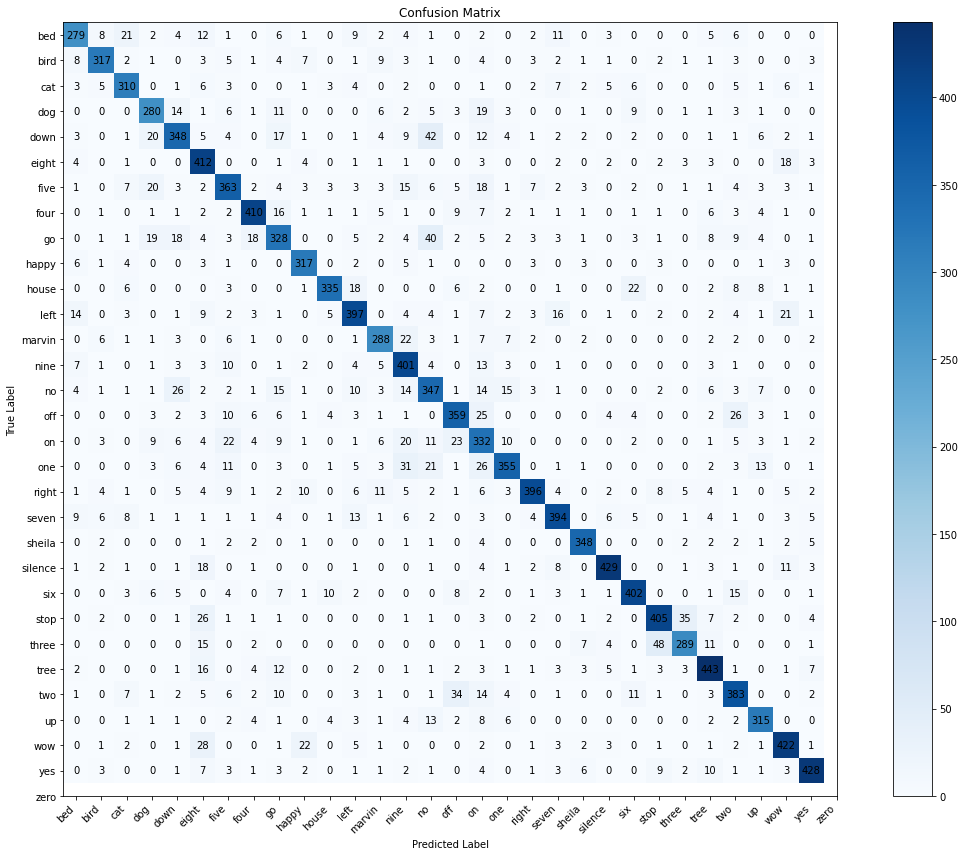

In [11]:
cm = results['confusion_matrix']
labels = list(train_loader.class_to_idx.keys())

fig, ax = plt.subplots(figsize=(20, 12))
im = ax.imshow(cm, interpolation='nearest', cmap='Blues', vmin=0, vmax=cm.max())

ax.set(
    xticks=np.arange(len(labels)),
    yticks=np.arange(len(labels)),
    xticklabels=labels,
    yticklabels=labels,
    xlabel='Predicted Label',
    ylabel='True Label',
    title='Confusion Matrix'
)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, f"{cm[i, j]:d}", ha='center', va='center')

fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
fig.tight_layout()
plt.show()


In [17]:
# For spectogram data
train_dir = DATA_PATH / Path("spectogram_transformed", "training")
val_dir = DATA_PATH / Path("spectogram_transformed", "validation")
test_dir = DATA_PATH / Path("spectogram_transformed", "testing")

batch_size = 8

train_loader = DataLoader(
    data_dir=train_dir,
    data_type='spectrogram',
    batch_size=batch_size,
    shuffle=True
)
val_loader = DataLoader(
    data_dir=val_dir,
    data_type='spectrogram',
    batch_size=batch_size,
    shuffle=True
)

test_loader = DataLoader(
    data_dir=test_dir,
    data_type='spectrogram',
    batch_size=batch_size,
    shuffle=True
)

In [18]:
batch = next(iter(test_loader))
sample = batch.data[0]
C, *rest = sample.shape
if len(rest) == 1:
    input_dim = C
else:
    H, W = rest
    input_dim = C * H

num_classes = len(train_loader.class_to_idx)

model = CustomTransformerModel(
    input_dim=input_dim,
    num_classes=num_classes,
    d_model=128,
    nhead=16,
    num_layers=2,
    lr=6.105370611048516e-05,
    dropout=0.6438441723101728
).to(device)

In [19]:
# training loop
model.train_architecture(train_loader = train_loader, epochs = 8, val_loader=val_loader)

Epoch 1/8 - train loss: 2.7666 - train accuracy: 0.2046


Evaluating: 100%|██████████| 1722/1722 [05:14<00:00,  5.47it/s]


Epoch 1/8 - val   loss: 1.9600 - val   accuracy: 0.4014
Epoch 2/8 - train loss: 1.5406 - train accuracy: 0.5463


Evaluating: 100%|██████████| 1722/1722 [00:17<00:00, 99.78it/s] 


Epoch 2/8 - val   loss: 1.2930 - val   accuracy: 0.6239
Epoch 3/8 - train loss: 1.1107 - train accuracy: 0.6831


Evaluating: 100%|██████████| 1722/1722 [00:17<00:00, 96.00it/s] 


Epoch 3/8 - val   loss: 1.0808 - val   accuracy: 0.6811
Epoch 4/8 - train loss: 0.8865 - train accuracy: 0.7477


Evaluating: 100%|██████████| 1722/1722 [00:18<00:00, 94.01it/s] 


Epoch 4/8 - val   loss: 0.8844 - val   accuracy: 0.7464
Epoch 5/8 - train loss: 0.7386 - train accuracy: 0.7860


Evaluating: 100%|██████████| 1722/1722 [00:17<00:00, 100.28it/s]


Epoch 5/8 - val   loss: 0.7883 - val   accuracy: 0.7740
Epoch 6/8 - train loss: 0.6336 - train accuracy: 0.8177


Evaluating: 100%|██████████| 1722/1722 [00:17<00:00, 97.01it/s] 


Epoch 6/8 - val   loss: 0.6796 - val   accuracy: 0.8042
Epoch 7/8 - train loss: 0.5631 - train accuracy: 0.8388


Evaluating: 100%|██████████| 1722/1722 [00:19<00:00, 87.48it/s] 


Epoch 7/8 - val   loss: 0.6123 - val   accuracy: 0.8237
Epoch 8/8 - train loss: 0.5121 - train accuracy: 0.8520


Evaluating: 100%|██████████| 1722/1722 [00:17<00:00, 97.46it/s] 

Epoch 8/8 - val   loss: 0.5904 - val   accuracy: 0.8291


In [20]:
results = model.evaluate(test_loader)
print("Validation Summary:")
for k, v in results['summary'].items():
    print(f"  {k}: {v:.4f}")

Evaluating: 100%|██████████| 1684/1684 [04:58<00:00,  5.64it/s]


Validation Summary:
  loss: 0.5335
  accuracy: 0.8469
  precision: 0.8569
  recall: 0.8485
  f1: 0.8497


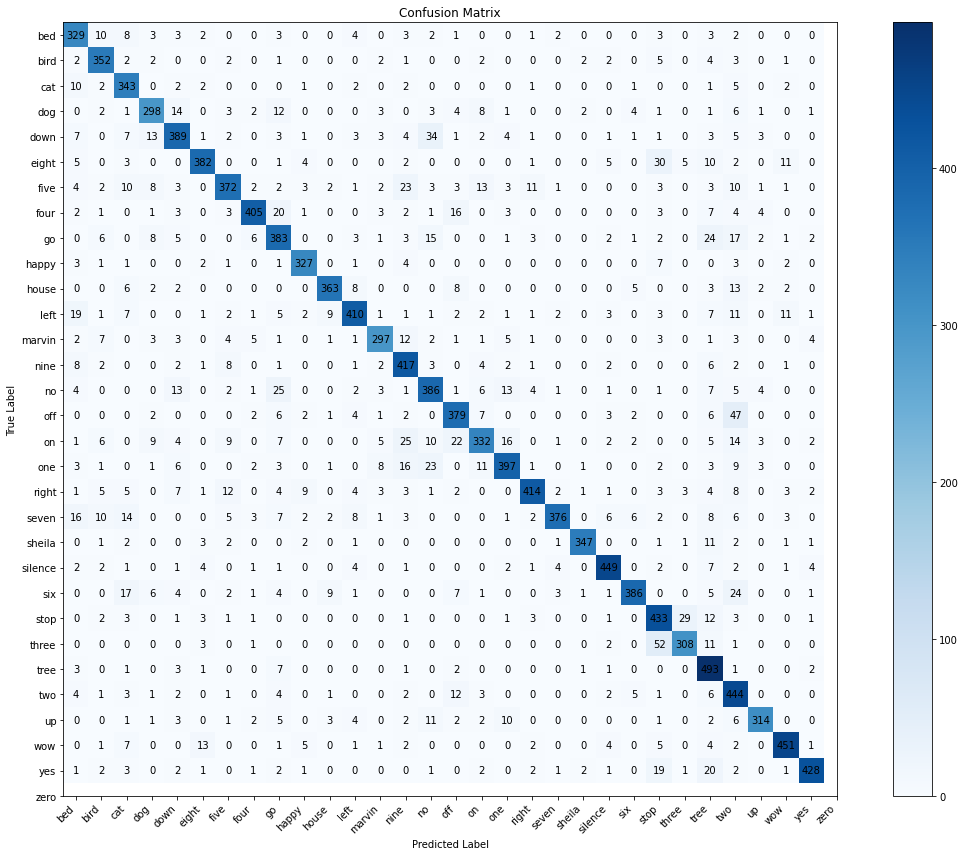

In [21]:
cm = results['confusion_matrix']
labels = list(train_loader.class_to_idx.keys())

fig, ax = plt.subplots(figsize=(20, 12))
im = ax.imshow(cm, interpolation='nearest', cmap='Blues', vmin=0, vmax=cm.max())

ax.set(
    xticks=np.arange(len(labels)),
    yticks=np.arange(len(labels)),
    xticklabels=labels,
    yticklabels=labels,
    xlabel='Predicted Label',
    ylabel='True Label',
    title='Confusion Matrix'
)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, f"{cm[i, j]:d}", ha='center', va='center')

fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
fig.tight_layout()
plt.show()


In [30]:
# For spectogram data
train_dir = DATA_PATH / Path("Statistical_transform", "training")
val_dir = DATA_PATH / Path("Statistical_transform", "validation")
test_dir = DATA_PATH / Path("Statistical_transform", "testing")

batch_size = 8

train_loader = DataLoader(
    data_dir=train_dir,
    data_type='moving',
    batch_size=batch_size,
    shuffle=True
)
val_loader = DataLoader(
    data_dir=val_dir,
    data_type='moving',
    batch_size=batch_size,
    shuffle=True
)

test_loader = DataLoader(
    data_dir=test_dir,
    data_type='moving',
    batch_size=batch_size,
    shuffle=True
)

In [33]:
batch = next(iter(train_loader))
sample = batch.data[0]
C, *rest = sample.shape
if len(rest) == 1:
    input_dim = C
else:
    H, W = rest
    input_dim = C * H

num_classes = len(train_loader.class_to_idx)

model = CustomTransformerModel(
    input_dim=input_dim,
    num_classes=num_classes,
    d_model=128,
    nhead=16,
    num_layers=2,
    lr=6.105370611048516e-05,
    dropout=0.6438441723101728
).to(device)

c:\Users\aaf6\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
